# Detecting the presence of heart disease in patients

Mostafa Salem


# Description of Project:

Using Data Mining to Identify presence of heart disease in the patient. A Classification  Analysis using Supervised Learning 


# Business Problem & Overview


According to the CDC, heart disease is the leading cause of death for men and women in the United States. Approximately 655,000 Americans die from heart disease each year. About 805,000 Americans have a heart attack each year. Research showed that heart disease costs the United States about $219 billion each year. These costs include health care services and medicines.

Through this data mining project on the patient dataset available, our group aims to implement efficient and effective methods of detecting the presence of heart disease in patients. This project's objective is to reduce the high number of fatal heart disease cases and healthcare costs by providing the medical field a valuable detection tool to treat and prevent cases. 


# Dataset Description
Dataset Description:
For this project, we will be using the Heart Disease dataset from Kaggle:
https://www.kaggle.com/johnsmith88/heart-disease-dataset

The dataset consists of  data collected from 4 different sources on factors regarding heart disease diagnosis dating back to 1988.The dataset includes 1025 instances and 14 attributes.
Dataset:heart.csv containing the following attrbutes:

1.age: The peron's in years
2.sex: The person's sex (1= male, 0= female)
3.cp: The chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4.trestbps: The person's resting blood pressure
5.chol: serum cholestoral in mg/dl
6.fbs: fasting blood sugar > 120 mg/dl
7.restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8.thalach: maximum heart rate achieved
9.exang: exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12.ca: number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14.target

For this project, we will analyze the target variable “Target”. The attribute “Target” documents a person with heart disease and a person without heart disease. This data is a Binary Classification with two class labels as ( 0 = no, 1= yes) which target 0 indicates no disease and target 1 indicates disease. Due to the data, we will be working with Classification predictive modeling.

In [1]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Import libraries 
%matplotlib inline
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
import graphviz
from sklearn.linear_model import LinearRegression
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
heartdisease_df = pd.read_csv('heart.csv')

# 1.Data Preparation

In [3]:
#Checking the top rows of the dataset to see if this data
heartdisease_df.head()  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Check the shape of the dataset

print("Number of rows in the dataset: ", heartdisease_df.shape[0])
print("Number of columns in the dataset: ", heartdisease_df.shape[1])

Number of rows in the dataset:  1025
Number of columns in the dataset:  14


In [5]:
#checking the basic distribution of the dataset
heartdisease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 1.a Finding the frequency of target variable 

1    526
0    499
Name: target, dtype: int64

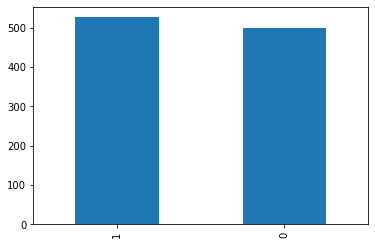

In [6]:
heartdisease_df['target'].value_counts().plot(kind='bar')
#Finding the frequency of target variable
heartdisease_df.target.value_counts()

## 1.b.Missing values

In [7]:
#1.b.Missing values
heartdisease_df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values in this dataset.

In [8]:
# duplicates
heartdisease_df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [9]:
#removing duplicate
heartdisease_df.drop_duplicates()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [10]:
#Finding the number of attributes and instances after dropping the duplicates
heartdisease_df.shape

(1025, 14)

## 1c. Relationship between variables

How many of each class are there?

 with heart disease:  526
 without heart disease:  499


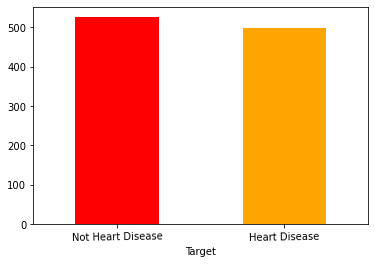

In [10]:

heartdisease_df.target.value_counts().plot(kind='bar',
                              xlabel='Target',
                              color=['red', 'orange']);
plt.xticks([1, 0], ["Heart Disease", "Not Heart Disease"], rotation=1);

print(" with heart disease: ", len(heartdisease_df[heartdisease_df['target'] == 1]))
print(" without heart disease: ", len(heartdisease_df[heartdisease_df['target'] == 0]))


### Heart Disease Frequency According to gender

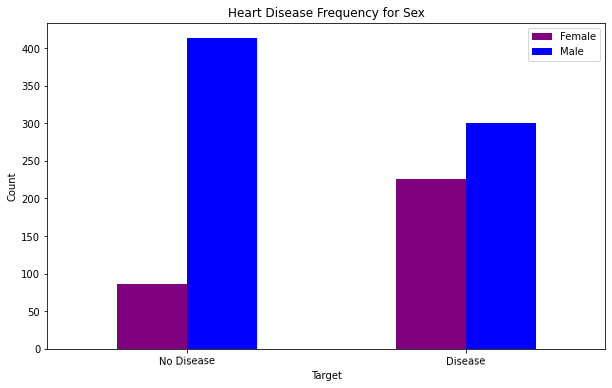

In [11]:
pd.crosstab(heartdisease_df.target, heartdisease_df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['purple', 'blue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks([0, 1], ["No Disease", "Disease"], rotation=1);

### Heart Disease presence by Age

Text(0.5, 1.0, 'Heart Disease Presence by Age')

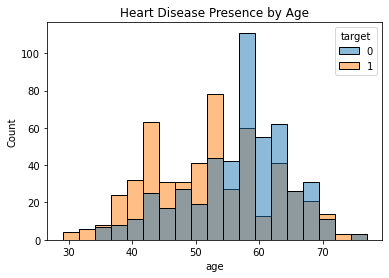

In [12]:
ax = sns.histplot(x='age',data=heartdisease_df,hue='target')
ax.set_title('Heart Disease Presence by Age')

Text(0.5, 0, 'Max Heart Rate')

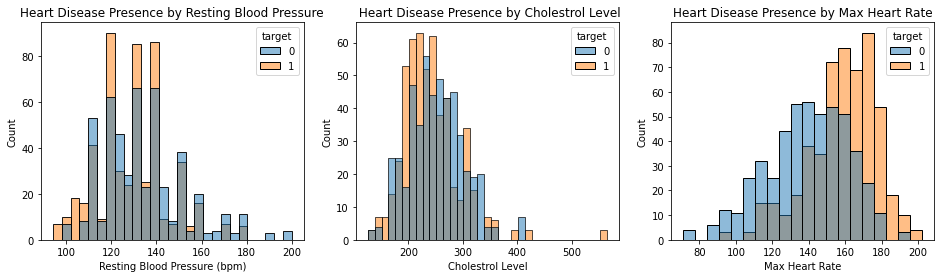

In [13]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.subplot(1,3,1)
ax = sns.histplot(x='trestbps',data=heartdisease_df,hue='target')
ax.set_title('Heart Disease Presence by Resting Blood Pressure')
ax.set_xlabel('Resting Blood Pressure (bpm)')

plt.subplot(1,3,2)
ax = sns.histplot(x='chol',data=heartdisease_df,hue='target')
ax.set_title(' Heart Disease Presence by Cholestrol Level')
ax.set_xlabel('Cholestrol Level')

plt.subplot(1,3,3)
ax = sns.histplot(x='thalach',data=heartdisease_df,hue='target')
ax.set_title('Heart Disease Presence by Max Heart Rate')
ax.set_xlabel('Max Heart Rate')

Resting Blood Pressure does not seem to have an effect on whether someone has heart disease.
Lower or high cholestrol does not seem to have an effect on whether someone has heart disease.
Higher max heart rate raises chance of heart disease. 

Text(0.5, 0, 'Thal')

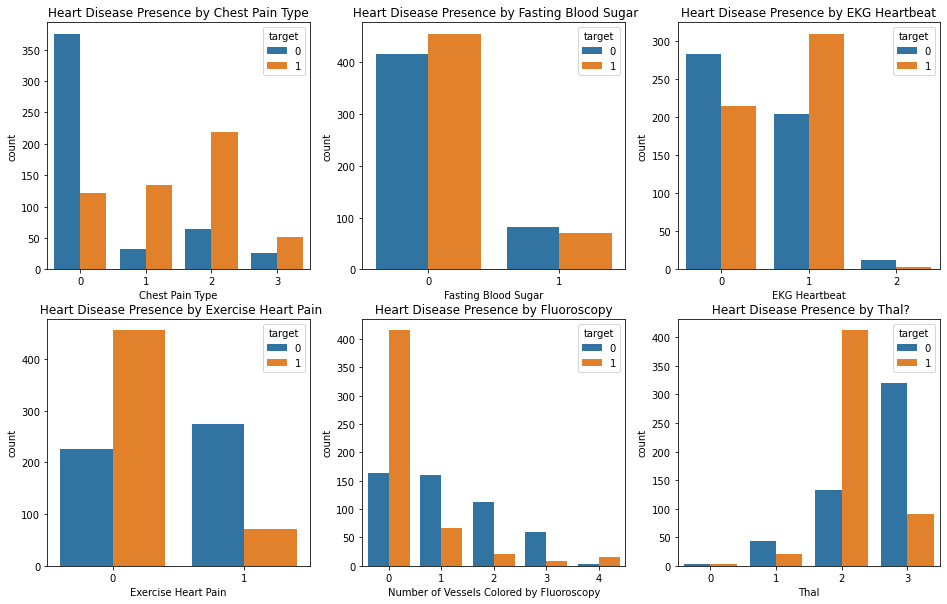

In [14]:
plt.rcParams['figure.figsize'] = [16, 10]

plt.subplot(2,3,1)
ax = sns.countplot(x='cp',hue='target',data=heartdisease_df)
ax.set_title('Heart Disease Presence by Chest Pain Type')
ax.set_xlabel('Chest Pain Type')
plt.subplot(2,3,2)
ax = sns.countplot(x='fbs',hue='target',data=heartdisease_df)
ax.set_title(' Heart Disease Presence by Fasting Blood Sugar')
ax.set_xlabel('Fasting Blood Sugar')
plt.subplot(2,3,3)
ax = sns.countplot(x='restecg',hue='target',data=heartdisease_df)
ax.set_title('Heart Disease Presence by EKG Heartbeat')
ax.set_xlabel('EKG Heartbeat')
plt.subplot(2,3,4)
ax = sns.countplot(x='exang',hue='target',data=heartdisease_df)
ax.set_title(' Heart Disease Presence by Exercise Heart Pain')
ax.set_xlabel('Exercise Heart Pain')
plt.subplot(2,3,5)
ax = sns.countplot(x='ca',hue='target',data=heartdisease_df)
ax.set_title('Heart Disease Presence by Fluoroscopy')
ax.set_xlabel('Number of Vessels Colored by Fluoroscopy')
plt.subplot(2,3,6)
ax = sns.countplot(x='thal',hue='target',data=heartdisease_df)
ax.set_title(' Heart Disease Presence by Thal?')
ax.set_xlabel('Thal')


It seems safe to assume that a value of 0 indicates no chest pain. 
Lower blood sugar slightly correlates with no heart disease. 
Assuming 0 means no abnormal heartbeat. patients with abnormal heartbeat has higher chances of presence of heartdisease
Initially would assume 0 means no heart pain. 0 strongly correlates with presence of heart disease. We would expect presence of heart pain to correlate with presence of heart disease. Perhaps 0 means heart pain.
The more vessels that are colored by fluoroscopy, the less chance of heart disease. 
Thalassemia: shows higher chances of presence of heart disease with value 2
Higher EKG slope indicates higher chances of presence of heart disease 


From looking at the correlations independently, there are some questionable results. It seems that the data produced in this dataset was taken from patients that already had a reason to have their heart evaluated. This could accurately capture heart disease for patients that experience noticeable symptoms like abnormal heart behavior. On the other hand, it could miss unnoticeable symptoms that quietly develop over time, like high blood pressure or coronary artery disease. Additionally, we do not know what type of heart disease each of the patients with heart disease actually have. This dataset can skew towards a specific type of heart disease that is not representative of the actual percentages of heart disease in the general population. Therefore it model may overfit and end up not being a model to predict "heart disease" as a whole, but rather the specific type of heart disease that is overrepresented with this data.

Text(0.5, 0, 'EKG Slope')

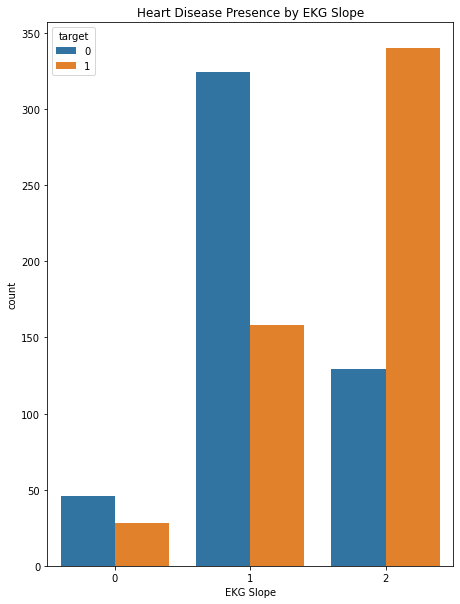

In [15]:
plt.subplot(1,2,2)
ax = sns.countplot(x='slope',data=heartdisease_df,hue='target')
ax.set_title('Heart Disease Presence by EKG Slope')
ax.set_xlabel('EKG Slope')

### Outliers

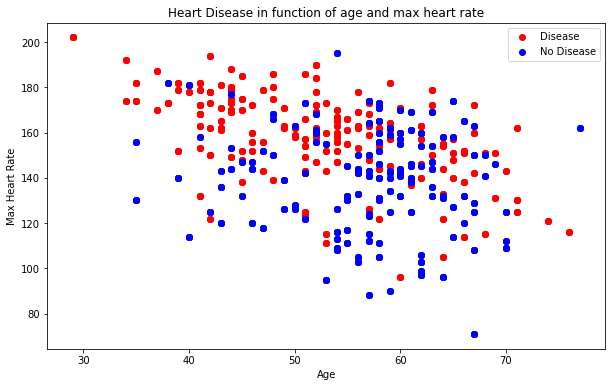

In [16]:
# d.Outliers
# Create a figure
plt.figure(figsize=(10, 6))


plt.scatter(heartdisease_df.age[heartdisease_df.target==1],
            heartdisease_df.thalach[heartdisease_df.target==1],
            color='red')

plt.scatter(heartdisease_df.age[heartdisease_df.target==0],
            heartdisease_df.thalach[heartdisease_df.target==0],
            color='blue')
# Add title, labels and legend
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

#### People with age < 40 and > 70 with max heart rate above 180 and less than 80 are with outliers we can see in the above scatter plot.


In [17]:
# Perhaps now we can drop all examples of subjects with age < 40 and > 70 to deal with outliers we can see in the above scatter plot.

print("under 40 years old: ", len(heartdisease_df.loc[heartdisease_df['age'] < 40]))
print("over 70 years old: ", len (heartdisease_df.loc[heartdisease_df["age"] > 70]))

under 40 years old:  57
over 70 years old:  20


In [18]:
# drop the above outliers
under_40 = heartdisease_df[heartdisease_df['age']<40].index
over_70 = heartdisease_df[heartdisease_df['age']>70].index
heartdisease_df.drop(under_40, inplace=True)
heartdisease_df.drop(over_70, inplace=True)

In [19]:
# Check that the outliers have been removed

print("under 40 years old: ", len(heartdisease_df.loc[heartdisease_df['age'] < 40]))
print("over 70 years old: ", len (heartdisease_df.loc[heartdisease_df["age"] > 70]))

under 40 years old:  0
over 70 years old:  0


<Figure size 720x432 with 0 Axes>

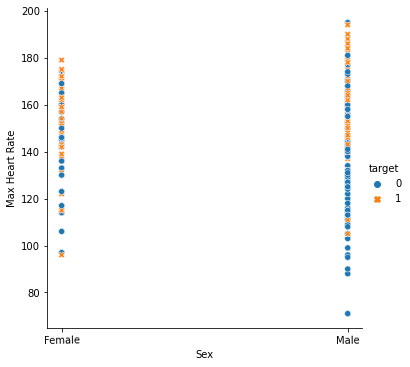

In [20]:
plt.figure(figsize=(10, 6))


sns.relplot(x="sex", y="thalach", 
            data=heartdisease_df,
            hue = 'target',
            kind="scatter", 
            style = 'target')
# Show plot

plt.xticks([1, 0], ["Male", "Female"], rotation=1);
plt.xlabel("Sex")
plt.ylabel("Max Heart Rate")
plt.show()


Females with max heartrate above 180 and males with max heart with above 180 are outliers.Also,males with max heart rate below 80

In [21]:
# Perhaps now we can drop all examples of subjects with max heart rate >180and < 80

print("under 80 max heart rate: ", len(heartdisease_df.loc[heartdisease_df['thalach'] < 80]))
print("over 180 max heart rate: ", len (heartdisease_df.loc[heartdisease_df["thalach"] > 180]))

under 80 max heart rate:  4
over 180 max heart rate:  39


In [22]:
# drop the above outliers
under_80 = heartdisease_df[heartdisease_df['thalach'] < 80].index
over_180 = heartdisease_df[heartdisease_df["thalach"] > 180].index
heartdisease_df.drop(under_80, inplace=True)
heartdisease_df.drop(over_180, inplace=True)

In [23]:
# Check that the outliers have been removed
print("under 80 max heart rate: ", len(heartdisease_df.loc[heartdisease_df['thalach'] < 80]))
print("over 180 max heart rate: ", len (heartdisease_df.loc[heartdisease_df["thalach"] > 180]))

under 80 max heart rate:  0
over 180 max heart rate:  0


<Figure size 720x432 with 0 Axes>

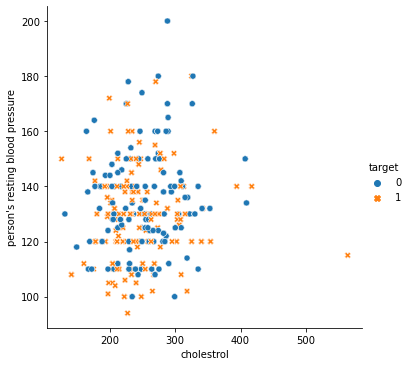

In [24]:
plt.figure(figsize=(10, 6))


sns.relplot(x="chol", y="trestbps", 
            data=heartdisease_df,
            hue = 'target',
            kind="scatter", 
            style = 'target')
# Show plot
plt.xlabel("cholestrol")
plt.ylabel("person's resting blood pressure")
plt.show()
plt.show()

As seen above,most of the data is concentrated in the middle ranges.We can consider persons with cholestrol higher than 300 and resting blood pessure more than 160 as outliers. 

In [27]:
# Perhaps now we can drop all examples of subjects with cholestrol > 300 and person's resting blood pressure >160

print("over 300 cholestrol: ", len(heartdisease_df.loc[heartdisease_df['chol'] >300 ]))
print("over 160 resting blood pessure: ", len (heartdisease_df.loc[heartdisease_df['trestbps'] > 160]))

over 300 cholestrol:  0
over 160 resting blood pessure:  39


In [28]:
# drop the above outliers
over_300 = heartdisease_df[heartdisease_df['chol'] >300 ].index
over_160 = heartdisease_df[heartdisease_df["trestbps"] > 160].index
heartdisease_df.drop(over_300, inplace=True)
heartdisease_df.drop(over_160, inplace=True)

In [29]:
# Check that the outliers have been removed
print("over 300 cholestrol: ", len(heartdisease_df.loc[heartdisease_df['chol'] >300 ]))
print("over 160 resting blood pessure: ", len (heartdisease_df.loc[heartdisease_df['trestbps'] > 160]))

over 300 cholestrol:  0
over 160 resting blood pessure:  0


<Figure size 720x432 with 0 Axes>

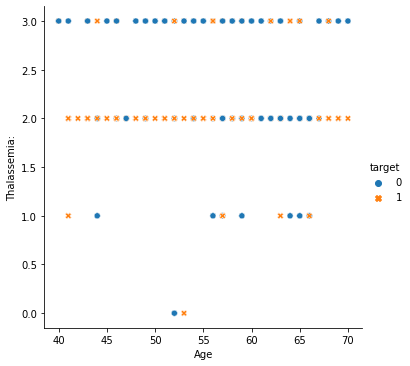

In [30]:
plt.figure(figsize=(10, 6))


sns.relplot(x="age", y="thal", 
            data=heartdisease_df,
            hue = 'target',
            kind="scatter", 
            style = 'target')
# Show plot
plt.xlabel("Age")
plt.ylabel("Thalassemia:")
plt.show()
plt.show()

Thalassemia: shows higher chances of presence of heart disease with value 2 Higher EKG slope indicates higher chances of presence of heart disease for all ages.

In [ ]:
heartdisease_df.shape

# 2. Baseline Model

Selecting the predictor variables and the outcome target variable of the dataset.
Partitioning the instances in the dataset with a test size of 30% using Scikit learns train_test_split method. 

In [31]:
predictors = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
outcome = 'target' 

X = heartdisease_df[predictors]
y = heartdisease_df[outcome]

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (512, 13) Validation set: (220, 13)


## Decision Tree - Baseline

Instantiating and fitting the model using Decision Tree classifier

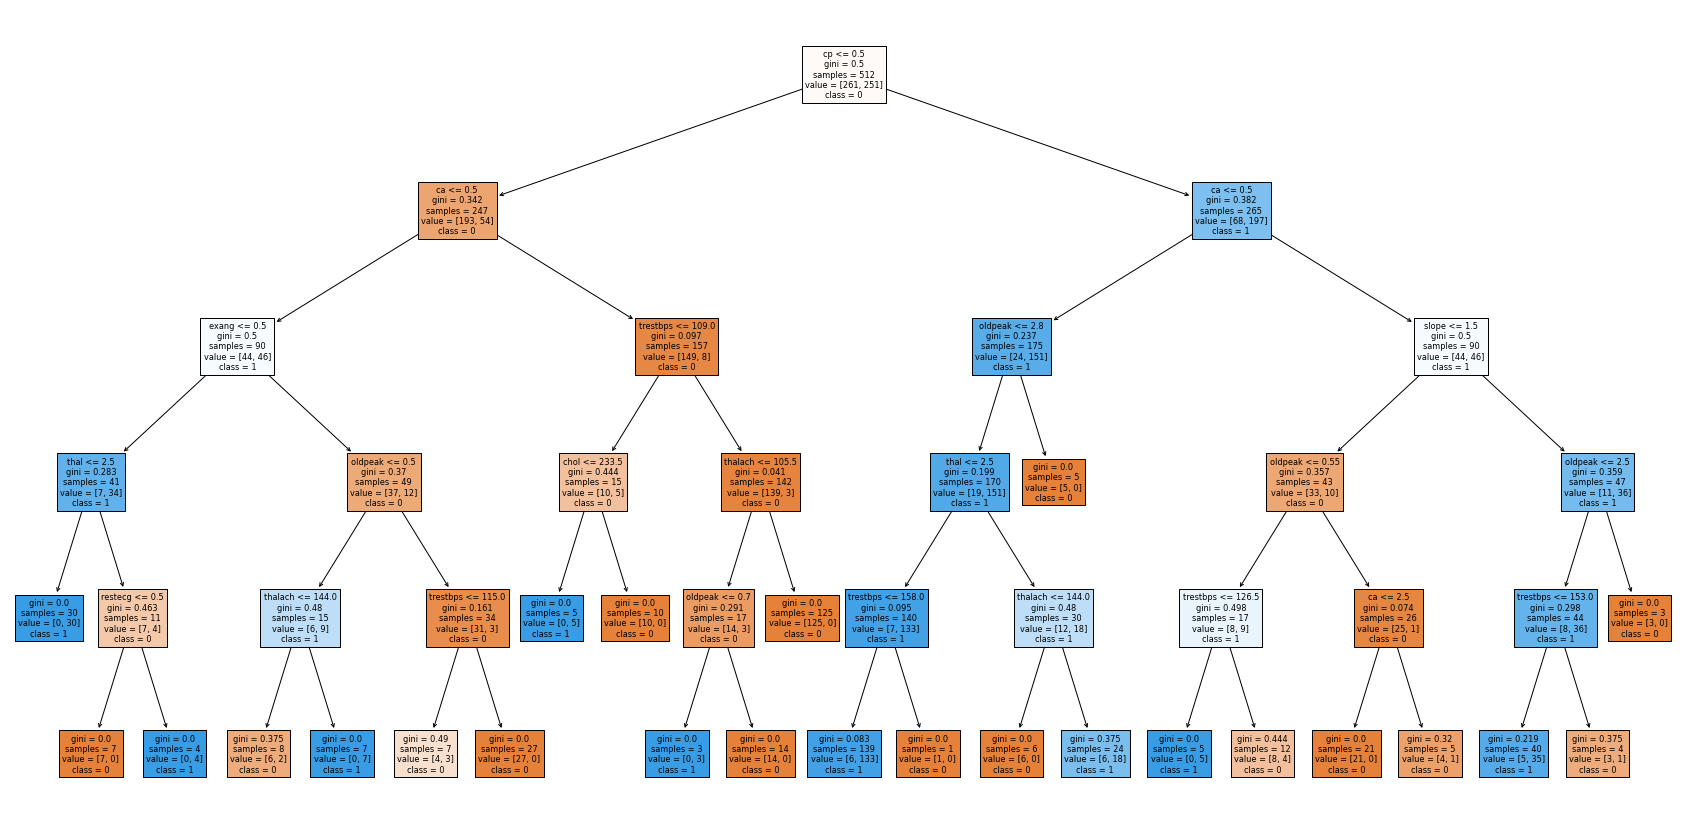

In [32]:
dt = DecisionTreeClassifier(max_depth = 5)#instantiate model
dt.fit(train_X, train_y) #fit model

fig = plt.figure(figsize=(30,15)) 
tree.plot_tree(dt, feature_names = heartdisease_df.columns, class_names = ['0','1'], filled = True) 
plt.show()

In [33]:
print("Accuracy:",accuracy_score(valid_y, dt.predict(valid_X)))
print("precision score: ", precision_score(valid_y,dt.predict(valid_X)))
print("recall score: ", recall_score(valid_y,dt.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,dt.predict(valid_X)))

Accuracy: 0.9181818181818182
precision score:  0.9351851851851852
recall score:  0.9017857142857143
f1-score:  0.9181818181818182


In [34]:
print("Accuracy:",accuracy_score(train_y, dt.predict(train_X)))
print("precision score: ", precision_score(train_y,dt.predict(train_X)))
print("recall score: ", recall_score(train_y,dt.predict(train_X)))
print("f1-score: ", f1_score(train_y,dt.predict(train_X)))

Accuracy: 0.9453125
precision score:  0.933852140077821
recall score:  0.9561752988047809
f1-score:  0.9448818897637795


The accuracy score metric, which is the fraction of samples predicted correctly is high for this decision tree baseline model at 90% for the testing data and 94% for the training data.
The precision score shows the fraction of predicted positives events that are actually positive, In this case the precision score is high for both data splits at 92% and 94%.
The recall score is the fraction of positives events that you predicted correctly, the recall score fell below 90 percent for the testing data at 87% and is 94% for the training data.
The f1 score is the mean of the precision and recall scores to compare models, In this case both f1 scores seem favorable at 90% and 94%.

## Logistic Regression - Baseline

In [35]:
logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(train_X, train_y)

LogisticRegression(solver='liblinear')

In [36]:
print('intercept ', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=X.columns).sort_values('coefficient',ascending=False))

intercept  1.0041450568725339
          coefficient
cp           0.954112
slope        0.899705
fbs          0.594083
restecg      0.505838
thalach      0.014503
trestbps    -0.000709
chol        -0.004452
age         -0.016260
thal        -0.474150
exang       -0.508802
oldpeak     -0.714858
ca          -0.938822
sex         -1.578151


In [37]:
print("Accuracy:",accuracy_score(valid_y, logit.predict(valid_X)))
print("precision score: ", precision_score(valid_y,logit.predict(valid_X)))
print("recall score: ", recall_score(valid_y,logit.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,logit.predict(valid_X)))

Accuracy: 0.8318181818181818
precision score:  0.8260869565217391
recall score:  0.8482142857142857
f1-score:  0.8370044052863437


In [38]:
print("Accuracy:",accuracy_score(train_y, logit.predict(train_X)))
print("precision score: ", precision_score(train_y,logit.predict(train_X)))
print("recall score: ", recall_score(train_y,logit.predict(train_X)))
print("f1-score: ", f1_score(train_y,logit.predict(train_X)))

Accuracy: 0.865234375
precision score:  0.8273381294964028
recall score:  0.9163346613545816
f1-score:  0.8695652173913044


The accuracy score metric for the logistic regression baseline model fell below the decision tree baseline model at 83% and 86%.
The precision score also fell below at 82 percent for both data splits.
The recall score for the testing data is 84% and 91% for the training data.
The f1 score shows that the logistic regression model is not the favorable model over the decision tree model. It is 6% under in the testing split and 8% under in the training split when comparing it the the f1 scores of the decision tree model.

## Naive Bayes - Baseline

In [39]:
nb = GaussianNB()
nb.fit(train_X, train_y)

GaussianNB()

In [40]:
print("Accuracy:",accuracy_score(valid_y, nb.predict(valid_X)))
print("precision score: ", precision_score(valid_y,nb.predict(valid_X)))
print("recall score: ", recall_score(valid_y,nb.predict(valid_X)))
print("f1-score: ", f1_score(valid_y,nb.predict(valid_X)))

Accuracy: 0.8318181818181818
precision score:  0.831858407079646
recall score:  0.8392857142857143
f1-score:  0.8355555555555555


In [41]:
print("Accuracy:",accuracy_score(train_y, nb.predict(train_X)))
print("precision score: ", precision_score(train_y,nb.predict(train_X)))
print("recall score: ", recall_score(train_y,nb.predict(train_X)))
print("f1-score: ", f1_score(train_y,nb.predict(train_X)))

Accuracy: 0.841796875
precision score:  0.8102189781021898
recall score:  0.8844621513944223
f1-score:  0.8457142857142856


When comparing the three baseline models, it is clear that the decison tree baseline models out performs the other two in the four classification metrics of accuracy, precision, recall, and f1 scores. 

# 3.Analysis of most important features

### 3.1 Correlation Matrix with sns.heatmap:

Correlation Matrix is a table that give a summarize data of a correlation coeffiction between two varible. It shows the relationship between two variables. 0 indicate that there is no correlation between two varibles, 1 indicate that there is a positve correlation between two variable and -1 indicate that a negative correaltion between two variable. Therefore, heatmap will make it easy for us to indentify which of the variable are most important to the target variable. 

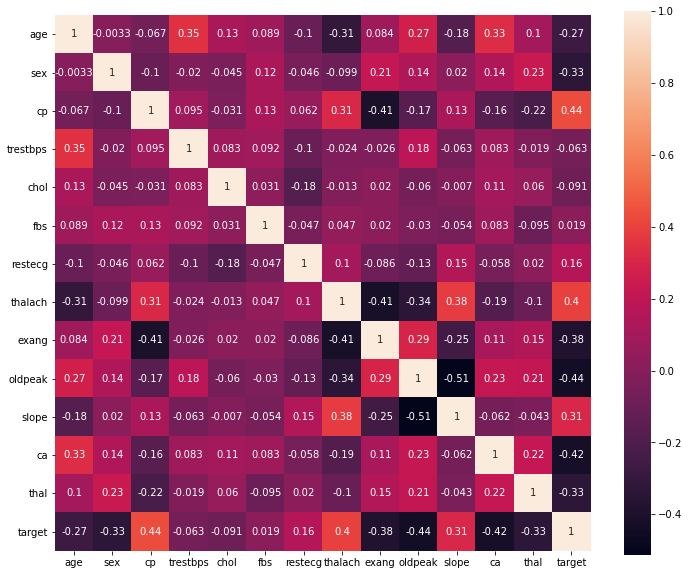

In [42]:
#check the correlation
plt.figure(figsize = (12,10))
sns.heatmap(heartdisease_df.corr(), annot = True, square = True)
plt.show()


According to the heatmap, we observed that 'cp'-chest pain has 0.44 coeffiction which is highly correlated to our target variable. Therefore, we can state that chest pain is an important feature in prediction of the heart disease. Therfore, following by the thalach - maximun heart rate achieved also has highly correlated with target variable. However, exang - exercise induced angina and oldpeak - ST depression induced by exercise relative to rest are negative correlated with the target variable which mean increase value in those variable will be decrease the value of the target variable.

### 3.2 Tree Based Feature Importance 

It is an in build class that will evauate the score of each feature value and the higher the score of the feature are the most insignficant. We will use Extra Tree classifier to generate the top features of the dataset. We decide to use this methond because it will provide us a better insight if the most significant feature in our dataset. First, we assign the model to Extra Trees Classifer then we fit the model in order to plot the feature important of that model.

[0.0755916  0.06723399 0.13475259 0.06419735 0.05884879 0.02041904
 0.03964168 0.08151114 0.08132426 0.08948719 0.0551099  0.14007758
 0.09180489]


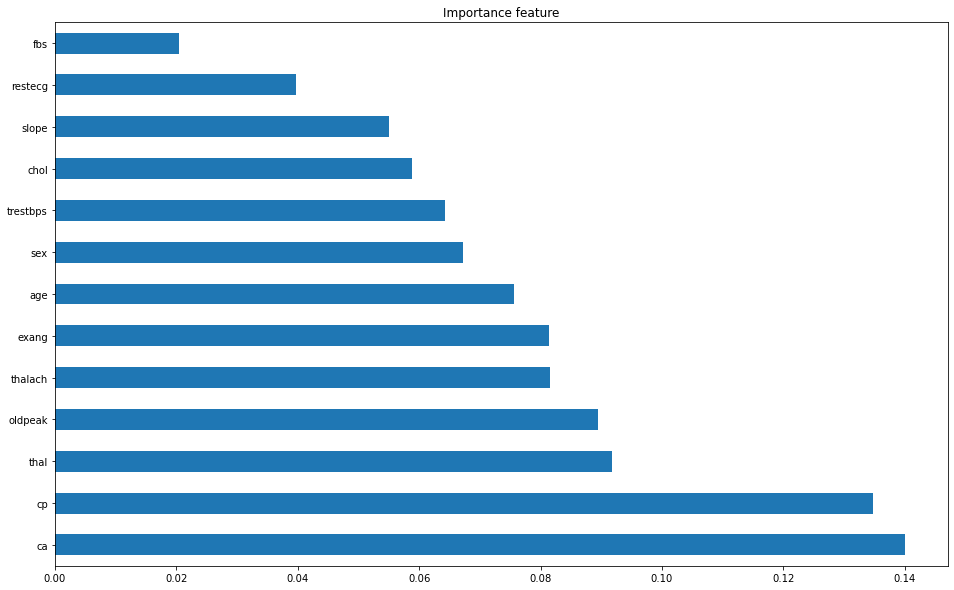

In [43]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feature_importances = pd.Series(model.feature_importances_, index = X.columns)
feature_importances.nlargest(13).plot(kind = 'barh')
plt.title('Importance feature')
plt.show()

We observed that 'ca' - the number of major vessels and 'cp' - chest pain are the most significant feature in predict of the target variable. however, 'fbs', 'restecg' and 'slope' - the slope of the peak exercise ST segment are the least signifiacnt feature in predict of the target variable.

# 4. Feature Engineering

After we have explored the dataset, we observed that we need to convert some of the catergorical features into dummies features before we train/test the model. We are using the get_dummies with drop_first = True method which will create the dummy columns for catergorical variable and drop the first columns of that variable. Then we scale the data using the standardscaler and transform it to a normal distrubution with the mean = 0 and standard deviation = 1.

In [44]:
# get dummies coding
heartdisease_df1 = pd.get_dummies(heartdisease_df, columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal'], drop_first = True)

In [45]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps','chol', 'thalach','oldpeak']
heartdisease_df1[columns_to_scale] = standardScaler.fit_transform(heartdisease_df1[columns_to_scale])

In [ ]:
heartdisease_df1.head()

After we created get dummy columns, We use the train_test_split from sklearn to split the data into two sets train and test. We set the train contains 70% of the data and the valid(test) contains 30% of the data. Next, we will set the X with the factor that we want to use in the model and y will be set as a target.

In [46]:
X = heartdisease_df1.drop(['target'], axis = 1)
y = heartdisease_df1['target']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 1)
print('Training set:' , train_X.shape, 'Validation set:', valid_X.shape)

Training set: (512, 22) Validation set: (220, 22)


## Decision Tree Model:

 We use the scikit-learn to build the decision tree classifier. The task is to predict our target variable and other variables with the spliting test and train dataset. We assign the decision tree classifer to dt and we set the max_depth to 5 which is we want 5 level of the tree's result.

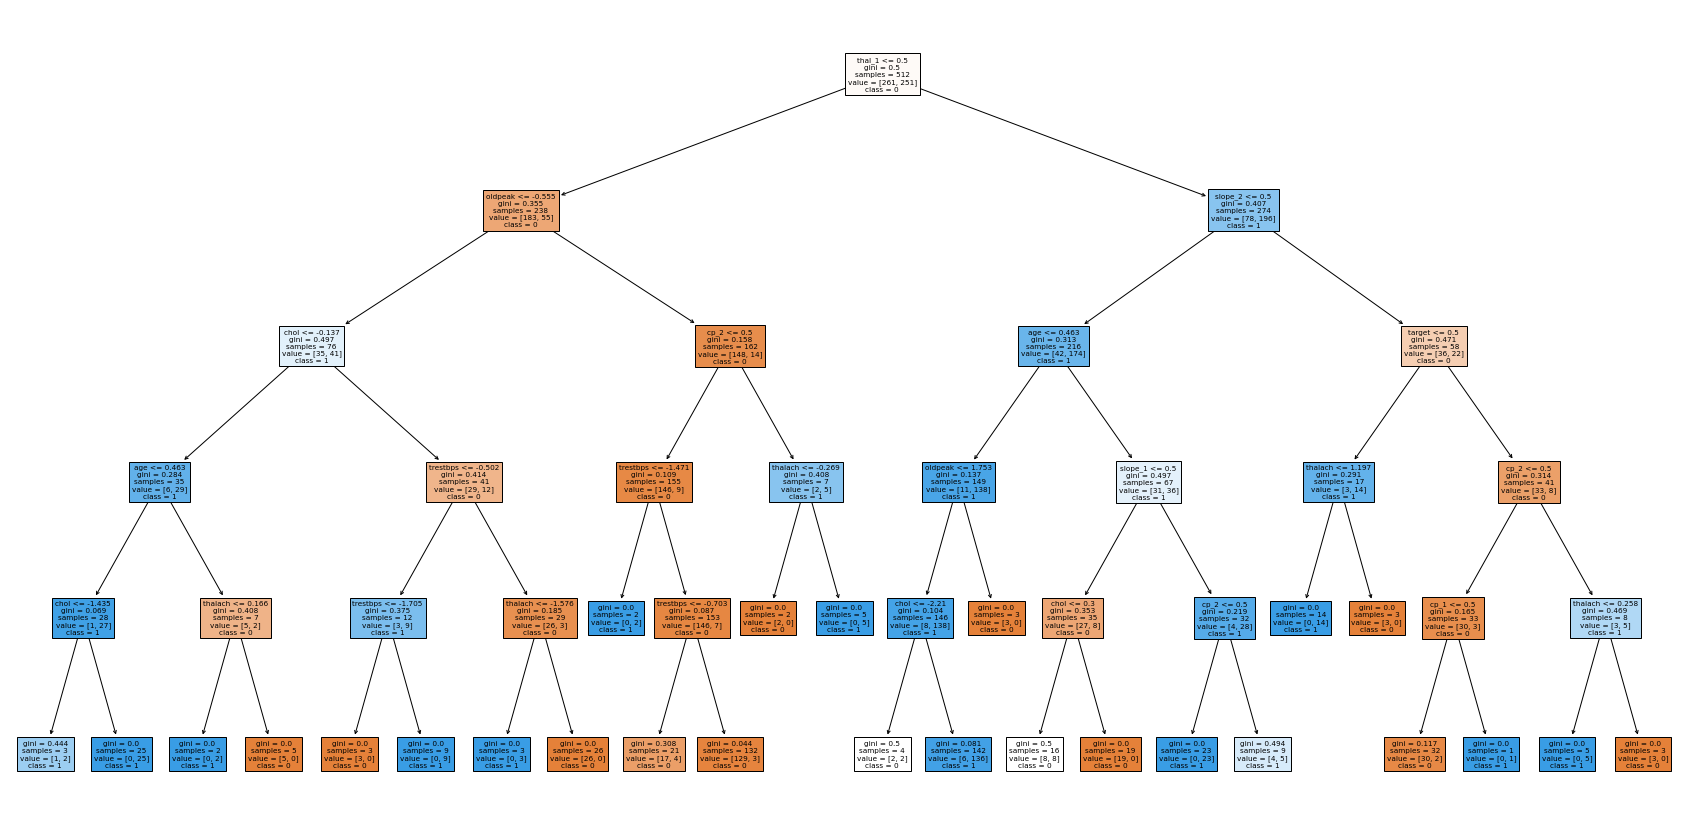

In [48]:
dt = DecisionTreeClassifier(max_depth = 5)#instantiate model
dt.fit(train_X, train_y) #fit model

fig = plt.figure(figsize=(30,15)) 
tree.plot_tree(dt, feature_names = heartdisease_df1.columns, class_names = ['0','1'], filled = True) 
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       108
           1       0.93      0.84      0.88       112

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



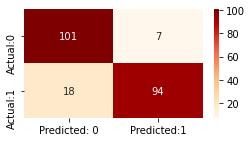

In [51]:
#model Evaluation
print(classification_report(valid_y, dt.predict(valid_X)))
cm = confusion_matrix(valid_y,dt.predict(valid_X))
conf_matrix_dt = pd.DataFrame(data = cm,
                             columns = ['Predicted: 0', 'Predicted:1'],
                             index = ['Actual:0', 'Actual:1'])
plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_dt, annot = True, fmt = 'd', cmap = 'OrRd')
plt.show()

As the result of our Decision Tree model, we observe that it has 89% of model accuarcy with 93% of the precision, 84% of the recall and 88% of the f1 score. The confusion matrix show that: There are 101 observation True Positive, and 94 observation are true negative. Follow with 7 of False positve and 18 of False negative. Following is the output of the train dataset. 

In [50]:
print(classification_report(train_y, dt.predict(train_X)))
print("Accuracy:",accuracy_score(train_y, dt.predict(train_X)))
print("precision score: ", precision_score(train_y,dt.predict(train_X)))
print("recall score: ", recall_score(train_y,dt.predict(train_X)))
print("f1-score: ", f1_score(train_y,dt.predict(train_X)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       261
           1       0.95      0.92      0.94       251

    accuracy                           0.94       512
   macro avg       0.94      0.94      0.94       512
weighted avg       0.94      0.94      0.94       512

Accuracy: 0.94140625
precision score:  0.9547325102880658
recall score:  0.9243027888446215
f1-score:  0.9392712550607287


## Logistic Regression Model: 

We are using this model because our dataset which has a dependent variable and more independent variables which we use to predit target variable with binary outcome of the dateset. We assign Logistic regression to logit and we set the penalty = '12' and solver = 'liblinear'. Then we fit the model with the X and y splite dataset.

In [52]:
logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(train_X, train_y)

LogisticRegression(solver='liblinear')

In [53]:
print('intercept ', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=X.columns).sort_values('coefficient',ascending=False))

intercept  0.17429691780338666
           coefficient
cp_3          1.944059
cp_2          1.850913
slope_2       0.978992
thal_1        0.853529
thal_2        0.807303
cp_1          0.714269
fbs_1         0.641516
restecg_1     0.368093
ca_4          0.322774
thalach       0.115980
age          -0.065560
restecg_2    -0.067764
chol         -0.169940
trestbps     -0.184859
slope_1      -0.328624
exang_1      -0.367112
thal_3       -0.451403
oldpeak      -0.869064
ca_3         -1.333547
sex_1        -1.357040
ca_1         -2.095036
ca_2         -2.357102


              precision    recall  f1-score   support

           0       0.85      0.92      0.88       108
           1       0.91      0.84      0.87       112

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



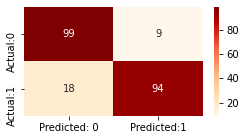

In [54]:
#model Evaluation
print(classification_report(valid_y, logit.predict(valid_X)))
cm = confusion_matrix(valid_y,logit.predict(valid_X))
conf_matrix_logit = pd.DataFrame(data = cm,
                             columns = ['Predicted: 0', 'Predicted:1'],
                             index = ['Actual:0', 'Actual:1'])
plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_logit, annot = True, fmt = 'd', cmap = 'OrRd')
plt.show()

After observe the output, The intercept of this model is 0.174 and cp_3 has the highest coefficient with 1.91. This model has 88% of accuracy with 90% of precision, 85% of recall and 88% of f1_score. The confusion matrix shown that there are 98 observation are True postive, 95 observation are True negative, 10 observations are False positve and17 observation are False negative. We also evaluate the model base on the train dataset with the output of accuracy, oercision, recall and f1 score shown in the output below:

In [ ]:
print(classification_report(train_y, logit.predict(train_X)))
print("Accuracy:",accuracy_score(train_y, logit.predict(train_X)))
print("precision score: ", precision_score(train_y,logit.predict(train_X)))
print("recall score: ", recall_score(train_y,logit.predict(train_X)))
print("f1-score: ", f1_score(train_y,logit.predict(train_X)))

## Navie Bayes

Navie Bayes method is a supervised learning algorithms. It is a family of algorithm that share common prinicple which give an assumption of indepence among predictor variable. we will use ouy split dataset to fit this model.

In [ ]:
nb = GaussianNB()
nb.fit(train_X, train_y)

In [ ]:
#model Evaluation
print(classification_report(valid_y, nb.predict(valid_X)))
cm = confusion_matrix(valid_y,nb.predict(valid_X))
conf_matrix_nb = pd.DataFrame(data = cm,
                             columns = ['Predicted: 0', 'Predicted:1'],
                             index = ['Actual:0', 'Actual:1'])
plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_nb, annot = True, fmt = 'd', cmap = 'OrRd')
plt.show()

We observed that the overall accuracy of the model is 78%. Follow by the 70% of the percision, 97% of recall and 82% of the f1-score. Below is the model evaluation of train dataset with the accuary, precision, recall and f1- score. 

In [ ]:
print(classification_report(train_y, nb.predict(train_X)))
print("Accuracy:",accuracy_score(train_y, nb.predict(train_X)))
print("precision score: ", precision_score(train_y,nb.predict(train_X)))
print("recall score: ", recall_score(train_y,nb.predict(train_X)))
print("f1-score: ", f1_score(train_y,nb.predict(train_X)))

## Random Forest: 

Random Forest model is one of the easy, flexible to use in machine learning algorithm that will product great result. We start with by assign Random Forest Classifier to RFC_model, then we set n_estimator to 20 which is the number of tree in the forest. random_state to 12 hich is to control the bootstrapping and max_depth of 5 which control the depth of the trees. Then we fit the dataset into the model.

In [ ]:
RFC_model = RandomForestClassifier(n_estimators = 20, random_state = 12, max_depth = 5)
RFC_model.fit(train_X, train_y)

In [ ]:
#model Evaluation
print(classification_report(valid_y, RFC_model.predict(valid_X)))
cm = confusion_matrix(valid_y,RFC_model.predict(valid_X))
conf_matrix_RFC = pd.DataFrame(data = cm,
                             columns = ['Predicted: 0', 'Predicted:1'],
                             index = ['Actual:0', 'Actual:1'])
plt.figure(figsize = (4,2))
sns.heatmap(conf_matrix_RFC, annot = True, fmt = 'd', cmap = 'OrRd')
plt.show()

The output of the random forest has 89% of accuracy. The precision is 92%, 85% of recall and 88% of f1 score. The confusion Matrix shown that 100 cases are True positive, 8 cases are false positive, 17 cases are false negative and 95 cases are True negative. Below is the output of the train dataset:

In [ ]:
print(classification_report(valid_y, RFC_model.predict(valid_X)))
print("Accuracy:",accuracy_score(train_y, RFC_model.predict(train_X)))
print("precision score: ", precision_score(train_y,RFC_model.predict(train_X)))
print("recall score: ", recall_score(train_y,RFC_model.predict(train_X)))
print("f1-score: ", f1_score(train_y,RFC_model.predict(train_X)))

Important feature of the Random forest model:

In [ ]:
RFC_importance = RFC_model.feature_importances_
RFC_importance_features = pd.DataFrame({'feature': train_X.columns, 'importance': RFC_importance})
RFC_importance_features = RFC_importance_features.sort_values('importance', ascending = False)
print(RFC_importance_features)
RFC_importance_features = pd.Series(RFC_model.feature_importances_, index = X.columns)
RFC_importance_features.nlargest(13).plot(kind = 'barh')
plt.title('Random Forest Importance Features')
plt.show()

After fit the model of the Random forest, then we used that model the predit the feature importnace of random forest. we observed that thal_2, oldpeak and exang_1 are the most important features. Furthermore sex_1 and ca_2 are the least important feature in the model.

## Model Accuracy: 

The part we just combine the accuary of each model so we know that which model has the highest prediction.

In [ ]:
model_accuracy1 = pd.DataFrame({'Model_Type':['Decision Tree', 'Logistic Regression','Random Forest', 'Naive Bayes'], 
                               'Accuracy':[accuracy_score(valid_y, dt.predict(valid_X))*100,accuracy_score(valid_y, logit.predict(valid_X))*100,accuracy_score(valid_y, RFC_model.predict(valid_X))*100,accuracy_score(valid_y, nb.predict(valid_X))*100],
                               'precision':[precision_score(valid_y,dt.predict(valid_X)),precision_score(valid_y,logit.predict(valid_X)),precision_score(valid_y,RFC_model.predict(valid_X)),precision_score(valid_y,nb.predict(valid_X))],
                               'recall score':[recall_score(valid_y,dt.predict(valid_X)),recall_score(valid_y,logit.predict(valid_X)),recall_score(valid_y,RFC_model.predict(valid_X)),recall_score(valid_y,nb.predict(valid_X))],
                               'f1-score':[f1_score(valid_y,dt.predict(valid_X)),f1_score(valid_y,logit.predict(valid_X)),f1_score(valid_y,RFC_model.predict(valid_X)),f1_score(valid_y,nb.predict(valid_X))]})
model_accuracy1

Based on the 4 models we have built. We can see that Random Forest model and Decision Tree model with 89%. Those 2 model has the highest percentage of accuracy. Also those two model have high number in precision, recall score and f1-score as well.

# 5. Paramater Tuning

### Logistic Regression

In [55]:
from sklearn.model_selection import GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(logit,param_grid=params,cv=10)
log_model.fit(train_X,train_y)

# Printing best parameters choosen through GridSearchCV
print('The best parameters for this model are',log_model.best_params_)
print(classification_report(train_y, log_model.predict(train_X)))
print("Accuracy:",accuracy_score(train_y, log_model.predict(train_X)))
print("precision score: ", precision_score(train_y,log_model.predict(train_X)))
print("recall score: ", recall_score(train_y,log_model.predict(train_X)))
print("f1-score: ", f1_score(train_y,log_model.predict(train_X)))

The best parameters for this model are {'C': 100, 'class_weight': None, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       261
           1       0.90      0.92      0.91       251

    accuracy                           0.91       512
   macro avg       0.91      0.91      0.91       512
weighted avg       0.91      0.91      0.91       512

Accuracy: 0.912109375
precision score:  0.90234375
recall score:  0.9203187250996016
f1-score:  0.9112426035502957


After running the GridsearchCV method on the logistic regression, it showcased that if we implement the above parameters we will increase the accuracy of the model.

### Decision Tree

In [ ]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1,10),
          'min_samples_split': range(1,10), 
          'min_samples_leaf':range(1,5)}
tree_model = GridSearchCV(dt, param_grid=params, n_jobs=-1, verbose=1)
tree_model.fit(train_X,train_y)
#Printing best parameters selected through GridSearchCV
print('The best parameters for this model are',tree_model.best_params_)
tree_model.best_estimator_
print('The accuracy score is',tree_model.best_score_)


In [ ]:
dt = DecisionTreeClassifier(max_depth = 9, criterion= "entropy", min_samples_leaf = 1, min_samples_split = 2)#instantiate model
dt.fit(train_X, train_y) #fit model


print(classification_report(train_y, dt.predict(train_X)))
print("Accuracy:",accuracy_score(train_y, dt.predict(train_X)))
print("precision score: ", precision_score(train_y,dt.predict(train_X)))
print("recall score: ", recall_score(train_y,dt.predict(train_X)))
print("f1-score: ", f1_score(train_y,dt.predict(train_X)))

After running the GridsearchCV method on the Decision Tree model, it showcased that if we implement the above parameters we will increase the accuracy of the model.

# 6. Ensembles and Stacking

Ensembles learning is a technique that we will use to improve our model accuracy. This technique is using muiltple model to make prediction and will generate the conclusion after all the model has made in the ensemble method. 

In [ ]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[dt,logit,RFC_model,nb],meta_classifier= logit, random_state=1)
scv.fit(train_X,train_y)
scv_predicted = scv.predict(valid_X)
scv_conf_matrix = confusion_matrix(valid_y, scv_predicted)
scv_acc_score = accuracy_score(valid_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print("Model is improved by:", (scv_acc_score*100) - accuracy_score(valid_y, logit.predict(valid_X))*100,'\n')
print(classification_report(valid_y,scv_predicted))

By using the Ensembeling technique, we are able to increase the accuracy of the model even further. 

# Conclusion
Investigation of the data shows trends that suggest a strong sampling bias. Even though our model gives a high Accuracy and F1 Score, it is likely that it is strongly overfitting to this data
1.	"Heart disease" may be too broad of a designation for an accurate model. This dataset provides risk factors that are unique to different types of heart disease. Although we are not an expert on this subject and therefore, we don't know how different types of heart characteristics relate to one another, it seems to me that certain types of heart disease can be very independent from one another.
2.	There should be some sort of random sampling from the general population if possible. This dataset seems very focused on people with pre-existing conditions, and people already in higher risk demographics (age/gender). Someone that is unlike the typical person evaluated in this dataset can give different results.


